## Gastos Deputados Federais no ano de 2019

#### Treinando e aprendendo analisar dados em Python

#### Arrumando e agregando os dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import collections as matcoll

In [2]:
dados = pd.read_csv("C:/Users/mcaio/Desktop/Nova pasta/Ano-2019.csv", delimiter= ";")

In [3]:
dados.tail(20)

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
284566,Fernando Borja,5.267385e+10,212504.0,547.0,2019,MG,AVANTE,56,122,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",...,2019,0,NaN,NaN,1660816,NaN,NaN,3462,6981098,https://www.camara.leg.br/cota-parlamentar/doc...
284567,Fernando Borja,5.267385e+10,212504.0,547.0,2019,MG,AVANTE,56,122,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",...,2019,0,NaN,NaN,1661683,NaN,NaN,3462,6983002,https://www.camara.leg.br/cota-parlamentar/doc...
284568,Fernando Borja,5.267385e+10,212504.0,547.0,2019,MG,AVANTE,56,122,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",...,2019,0,NaN,NaN,1660816,NaN,NaN,3462,6981154,https://www.camara.leg.br/cota-parlamentar/doc...
284569,Fernando Borja,5.267385e+10,212504.0,547.0,2019,MG,AVANTE,56,122,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",...,2019,0,NaN,NaN,1660816,NaN,NaN,3462,6981196,https://www.camara.leg.br/cota-parlamentar/doc...
284570,Fernando Borja,5.267385e+10,212504.0,547.0,2019,MG,AVANTE,56,122,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",...,2019,0,NaN,NaN,1661683,NaN,NaN,3462,6983063,https://www.camara.leg.br/cota-parlamentar/doc...
284571,Fernando Borja,5.267385e+10,212504.0,547.0,2019,MG,AVANTE,56,122,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",...,2019,0,NaN,NaN,1660816,NaN,NaN,3462,6981177,https://www.camara.leg.br/cota-parlamentar/doc...
284572,Fernando Borja,5.267385e+10,212504.0,547.0,2019,MG,AVANTE,56,122,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",...,2019,0,NaN,NaN,1660816,NaN,NaN,3462,6981186,https://www.camara.leg.br/cota-parlamentar/doc...
284573,Fernando Borja,5.267385e+10,212504.0,547.0,2019,MG,AVANTE,56,122,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",...,2019,0,NaN,NaN,1661683,NaN,NaN,3462,6983055,https://www.camara.leg.br/cota-parlamentar/doc...
284574,Fernando Borja,5.267385e+10,212504.0,547.0,2019,MG,AVANTE,56,122,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",...,2019,0,NaN,NaN,1661683,NaN,NaN,3462,6983076,https://www.camara.leg.br/cota-parlamentar/doc...
284575,Fernando Borja,5.267385e+10,212504.0,547.0,2019,MG,AVANTE,56,122,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",...,2019,0,NaN,NaN,1661683,NaN,NaN,3462,6983070,https://www.camara.leg.br/cota-parlamentar/doc...


In [4]:
dados.shape

(284586, 31)

In [5]:
dados = dados.rename(columns = {'X.U.FEFF.txNomeParlamentar': 'NomeParlamentar', 'txtFornecedor': 'fornecedor', 'txtDescricao':'Descricao', 'vlrLiquido':'ValorLiquido','vlrGlosa':'ValorGlosa','vlrDocumento':'ValorDocumento', 'datEmissao':'DataEmissao'})

In [ ]:
#teste = dados.loc[dados["ValorLiquido"] < 118.00, "txNomeParlamentar"]

In [6]:
dados = dados[dados['cpf'].notna()]

### Gastos por Partido

In [7]:
gastos_partido = dados[dados["numMes"] > 1]

gastos_partido = gastos_partido.groupby(['sgPartido'])['ValorLiquido'].sum().reset_index()


In [8]:
gastos_partido["ValorLiquido"] = gastos_partido["ValorLiquido"].div(1e6).round(3) 

In [9]:
gastos_partido.sort_values(by = "ValorLiquido", ascending = False)

,sgPartido,ValorLiquido
18,PT,22.500
16,PSL,16.979
10,PP,15.813
8,PL,15.228
14,PSD,13.552
3,MDB,13.449
22,REPUBLICANOS,12.661
15,PSDB,11.844
7,PDT,11.273
2,DEM,10.428


In [10]:
gastos_partido["percentual"] = (gastos_partido["ValorLiquido"] / gastos_partido["ValorLiquido"].sum()*100).round(2)

In [11]:
gastos_partido = gastos_partido.sort_values(by = "percentual", ascending = False)

In [12]:
gastos_partido

,sgPartido,ValorLiquido,percentual
18,PT,22.500,11.69
16,PSL,16.979,8.82
10,PP,15.813,8.22
8,PL,15.228,7.91
14,PSD,13.552,7.04
3,MDB,13.449,6.99
22,REPUBLICANOS,12.661,6.58
15,PSDB,11.844,6.15
7,PDT,11.273,5.86
2,DEM,10.428,5.42


#### Gráfico

In [13]:
partido = gastos_partido["sgPartido"]

gastos = gastos_partido["percentual"]

[Text(0.5, 0, '(%) em milhões'),
 Text(0.5, 1.0, 'Percentual(%) de Gastos dos Partidos em 2019')]

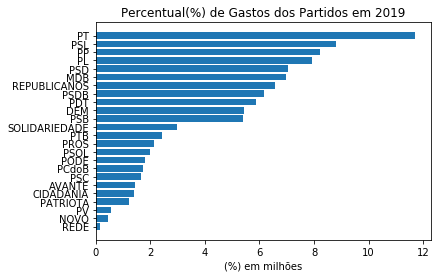

In [14]:
fig, ax = plt.subplots()
ax.barh(partido, gastos)
ax.invert_yaxis()
ax.set(title = "Percentual(%) de Gastos dos Partidos em 2019", xlabel = "(%) em milhões")

### Gastos por Atividades

In [15]:
gasto_atividades = dados[dados["numMes"] > 1] 

gasto_atividades = gasto_atividades[gasto_atividades["Descricao"] != "PASSAGEM AÉREA - SIGEPA"]

gasto_atividades = gasto_atividades[gasto_atividades["cpf"].notna()]

In [16]:
gasto_atividades = gasto_atividades.groupby(['Descricao'])['ValorLiquido'].sum().reset_index()

In [17]:
gasto_atividades["ValorLiquido"] = gasto_atividades["ValorLiquido"].div(1e6).round(3)

In [18]:
gasto_atividades = gasto_atividades.sort_values(by = "ValorLiquido", ascending = False)

In [19]:
gasto_atividades["percentual"] = (gasto_atividades["ValorLiquido"] / gasto_atividades["ValorLiquido"].sum()*100).round(3)

In [20]:
gasto_atividades

,Descricao,ValorLiquido,percentual
12,PASSAGEM AÉREA - RPA,51.500,26.752
3,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,44.223,22.972
8,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,24.729,12.846
9,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,21.720,11.283
2,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",19.036,9.889
1,COMBUSTÍVEIS E LUBRIFICANTES.,15.387,7.993
17,TELEFONIA,4.426,2.299
11,PASSAGEM AÉREA - REEMBOLSO,3.461,1.798
16,SERVIÇOS POSTAIS,1.708,0.887
5,"HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO ...",1.685,0.875


### Gráfico

In [21]:
atividades = gasto_atividades["Descricao"]

montante = gasto_atividades["ValorLiquido"]

[Text(0.5, 0, 'milhões de reais'),
 Text(0.5, 1.0, 'Gastos (em milhões) por atividades em 2019')]

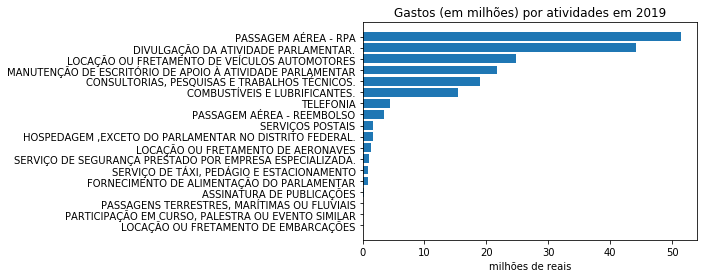

In [22]:
fig1, graf_atividades = plt.subplots()
graf_atividades.barh(atividades, montante)
graf_atividades.invert_yaxis()
graf_atividades.set(title = "Gastos (em milhões) por atividades em 2019", xlabel = "milhões de reais")

### Deputados que mais Gastaram em 2019

In [23]:
dep_gasto = dados[dados["numMes"] > 1]

dep_gasto = dep_gasto.groupby(['txNomeParlamentar'])["ValorLiquido"].sum().reset_index()

dep_gasto["ValorLiquido"] = dep_gasto["ValorLiquido"].div(1e3).round(3)

dep_gasto = dep_gasto.sort_values(by = "ValorLiquido", ascending = False)

In [24]:
mais_gastaram = dep_gasto.head(10)

#### Gráfico

In [25]:
politico = mais_gastaram["txNomeParlamentar"]

gasto_politico = mais_gastaram["ValorLiquido"]

[Text(0.5, 0, 'VALOR GASTO(MIL REAIS)'),
 Text(0.5, 1.0, 'OS 10 DEPUTADOS FEDERAIS QUE MAIS GASTARAM EM 2019')]

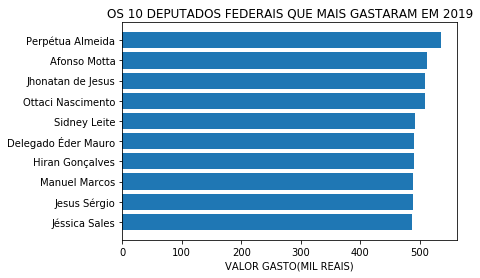

In [26]:
img, graph = plt.subplots()

graph.barh(politico, gasto_politico)
graph.invert_yaxis()
graph.set(title = "OS 10 DEPUTADOS FEDERAIS QUE MAIS GASTARAM EM 2019", xlabel = "VALOR GASTO(MIL REAIS)")

### 10 deputados que menos gastaram

In [27]:
menos_gastaram = dep_gasto.tail(10)

### Gráfico

In [28]:
politicos_menos = menos_gastaram["txNomeParlamentar"]

gastos_menos = menos_gastaram["ValorLiquido"]

[Text(0.5, 0, 'VALOR GASTO(MIL REAIS)'),
 Text(0.5, 1.0, 'OS 10 DEPUTADOS FEDERAIS QUE MENOS GASTARAM EM 2019')]

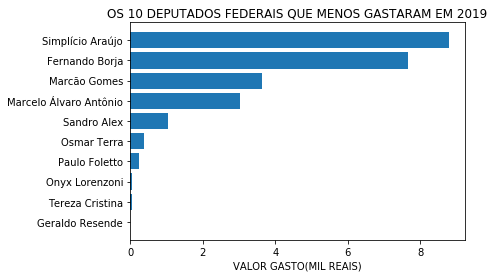

In [29]:
imagem, grafico = plt.subplots()

grafico.barh(politicos_menos, gastos_menos)
grafico.invert_yaxis()
grafico.set(title = "OS 10 DEPUTADOS FEDERAIS QUE MENOS GASTARAM EM 2019", xlabel = "VALOR GASTO(MIL REAIS)")

### Gastos por Estado

In [30]:
gastos_estados = dados[dados["numMes"] > 1]

gastos_estados = gastos_estados.groupby(["sgUF"])["ValorLiquido"].sum().reset_index()

gastos_estados["ValorLiquido"] = gastos_estados["ValorLiquido"].div(1e6).round(3)

gastos_estados = gastos_estados.sort_values("ValorLiquido", ascending = False)

In [31]:
gastos_estados

,sgUF,ValorLiquido
25,SP,23.392
10,MG,18.053
18,RJ,16.345
4,BA,16.018
22,RS,11.454
17,PR,11.443
15,PE,10.019
5,CE,9.608
9,MA,7.490
13,PA,7.453


In [32]:
estados = gastos_estados["sgUF"]

din_estados = gastos_estados["ValorLiquido"]


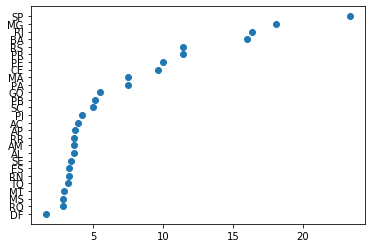

In [33]:
imagem2, gra = plt.subplots()

gra.scatter(din_estados, estados)
gra.invert_yaxis()